In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

# 9.1 맷플롯립 API 간략하게 살펴보기

[0 1 2 3 4 5 6 7 8 9]


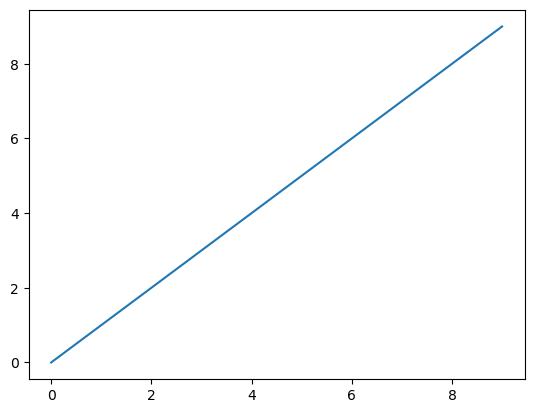

In [7]:
data = np.arange(10)
print(data)

plt.plot(data)

## 9.1.1 피겨와 서브플롯

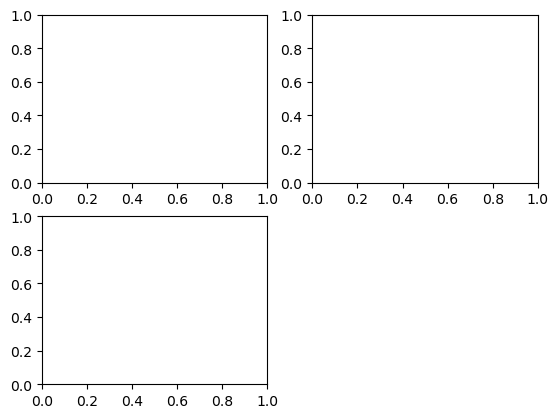

In [19]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

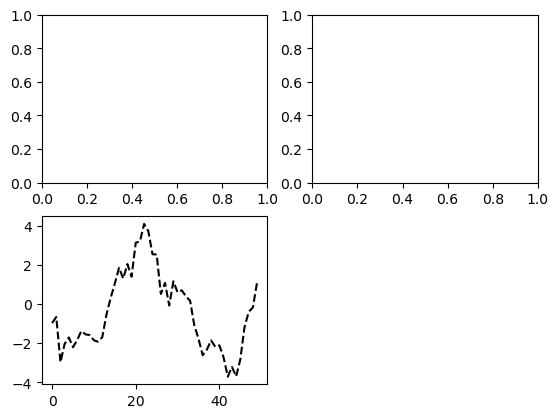

In [23]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

ax3.plot(np.random.standard_normal(50).cumsum(), color="black", linestyle="dashed")

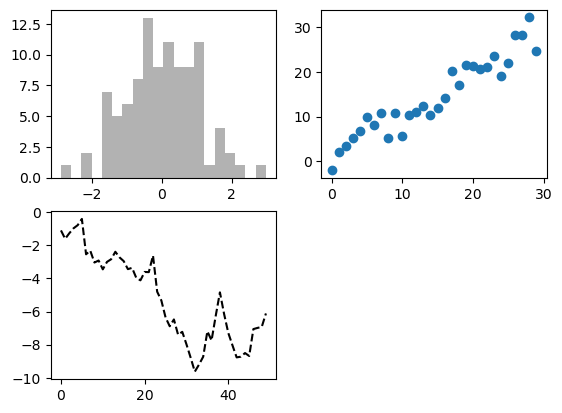

In [24]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

ax1.hist(np.random.standard_normal(100), bins=20, color="black", alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.standard_normal(30))
ax3.plot(np.random.standard_normal(50).cumsum(), color="black", linestyle="dashed")

#### 

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

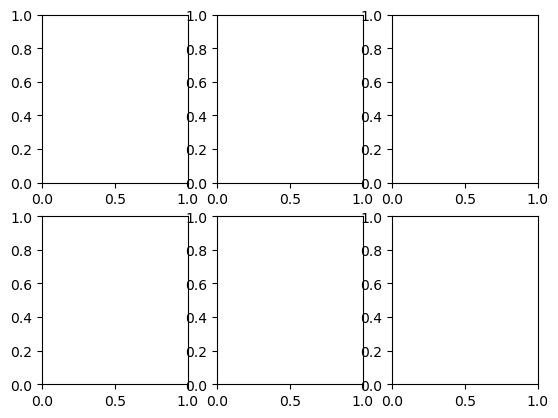

In [25]:
fig, axes = plt.subplots(2, 3)
axes


### 서브플롯 간 간격 조절하기

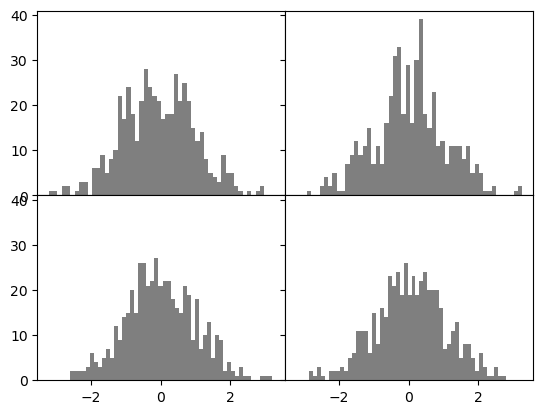

In [26]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)

for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.standard_normal(500), bins=50, color="black", alpha=0.5)
        
fig.subplots_adjust(wspace=0, hspace=0)

## 9.1.2 색상, 마커, 선 스타일

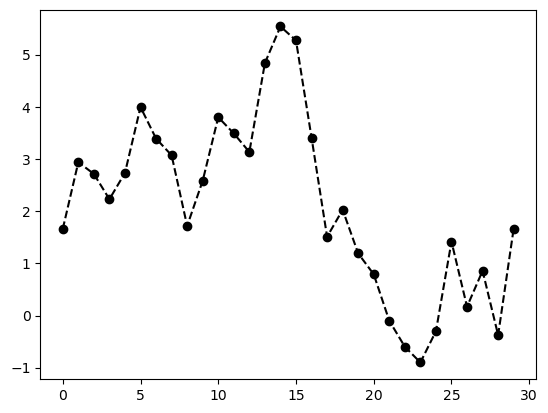

In [22]:
fig = plt.figure()
ax = fig.add_subplot()

ax.plot(np.random.standard_normal(30).cumsum(), color="black",
        linestyle="dashed", marker="o")

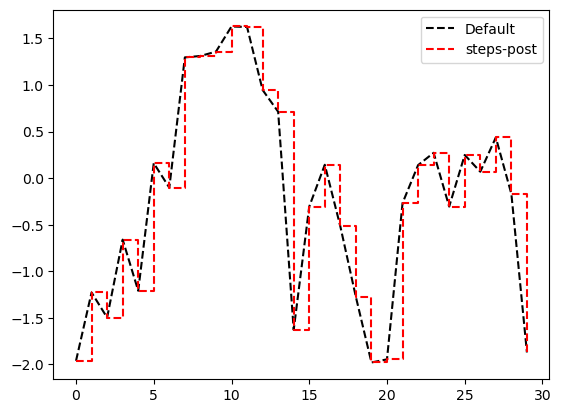

In [29]:
fig = plt.figure()
ax = fig.add_subplot()
data = np.random.standard_normal(30).cumsum()

ax.plot(data, color="black", linestyle="dashed", label="Default")
ax.plot(data, color="red", linestyle="dashed", drawstyle="steps-post", label="steps-post")
ax.legend()

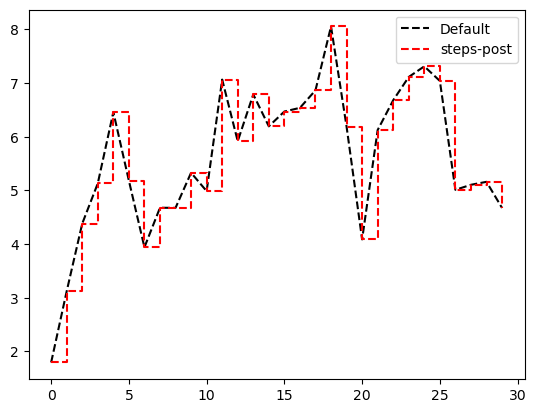

In [32]:
fig, ax = plt.subplots()
data = np.random.standard_normal(30).cumsum()

ax.plot(data, color="black", linestyle="dashed", label="Default")
ax.plot(data, color="red", linestyle="dashed", drawstyle="steps-post", label="steps-post")
ax.legend()

## 9.1.3 눈금, 레이블, 범례

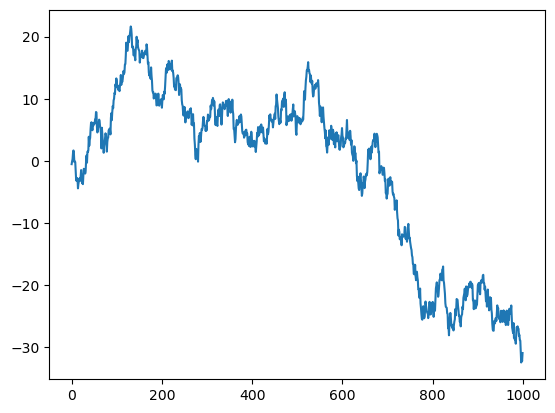

In [33]:
fig, ax = plt.subplots()

ax.plot(np.random.standard_normal(1000).cumsum())

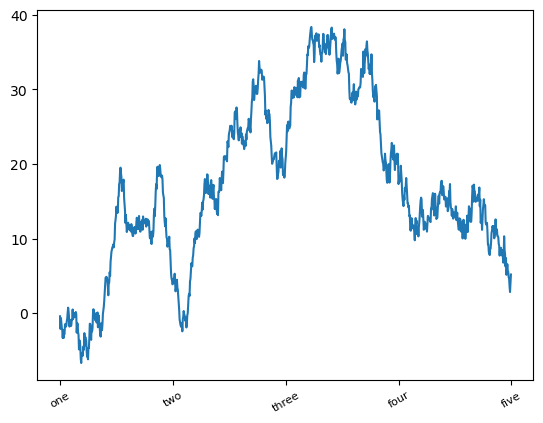

In [40]:
fig, ax = plt.subplots()
ax.plot(np.random.standard_normal(1000).cumsum())

ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(["one", "two", "three", "four", "five"], rotation=30, fontsize=8)

Text(0.5, 1.0, 'My first matplotlib plot')

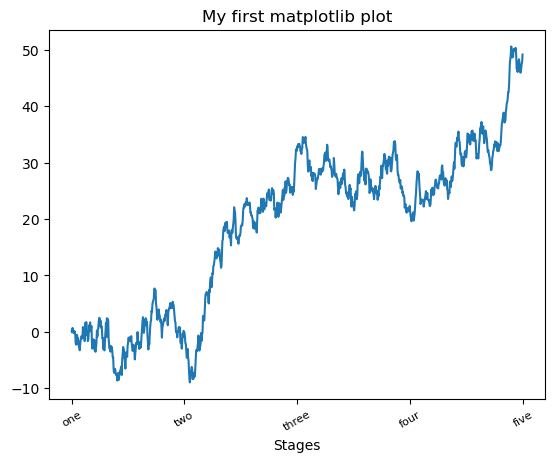

In [43]:
fig, ax = plt.subplots()
ax.plot(np.random.standard_normal(1000).cumsum())

ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(["one", "two", "three", "four", "five"], rotation=30, fontsize=8)

ax.set_xlabel("Stages")
ax.set_title("My first matplotlib plot")

[Text(0.5, 1.0, 'My first matplotlib plot'), Text(0.5, 0, 'Stages')]

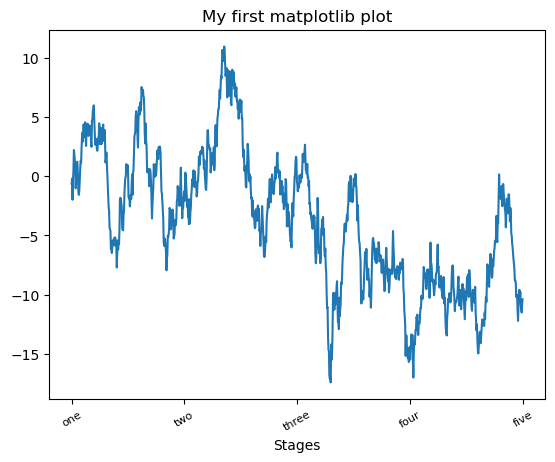

In [44]:
fig, ax = plt.subplots()
ax.plot(np.random.standard_normal(1000).cumsum())

ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(["one", "two", "three", "four", "five"], rotation=30, fontsize=8)

ax.set(title="My first matplotlib plot", xlabel="Stages")

### 범례 추가하기

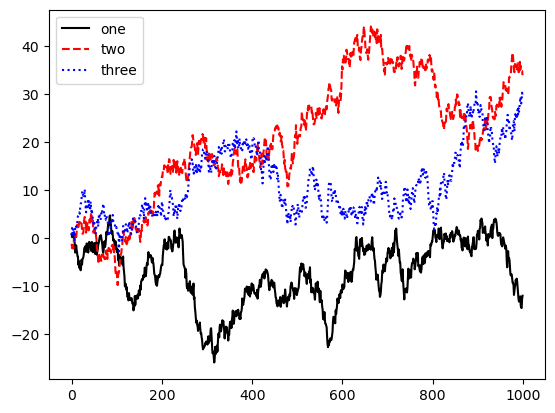

In [67]:
fig, ax = plt.subplots()

ax.plot(np.random.randn(1000).cumsum(), color="black", label="one")
ax.plot(np.random.randn(1000).cumsum(), color="red", linestyle="dashed", label="two")
ax.plot(np.random.randn(1000).cumsum(), color="blue", linestyle="dotted", label="three")

ax.legend()

## 9.1.4 주석과 그림 추가하기

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

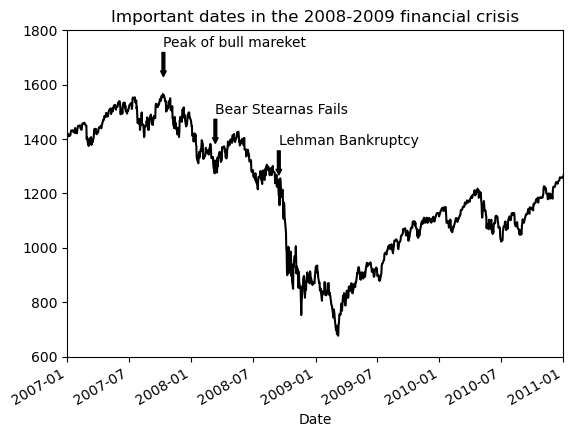

In [75]:
from datetime import datetime

fig, ax = plt.subplots()

data = pd.read_csv("spx.csv", index_col=0, parse_dates=True)
spx = data["SPX"]

spx.plot(ax=ax, color="black")

crisis_data = [
    (datetime(2007, 10, 11), "Peak of bull mareket"),
    (datetime(2008, 3, 12), "Bear Stearnas Fails"),
    (datetime(2008, 9, 15), "Lehman Bankruptcy")
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
               xytext=(date, spx.asof(date) + 225),
               arrowprops=dict(facecolor="black", headwidth=4, width=2, headlength=4),
               horizontalalignment="left", verticalalignment="top")
    
# 2007-2010 구간으로 확대
ax.set_xlim(["1/1/2007", "1/1/2011"])
ax.set_ylim([600, 1800])

ax.set_title("Important dates in the 2008-2009 financial crisis")

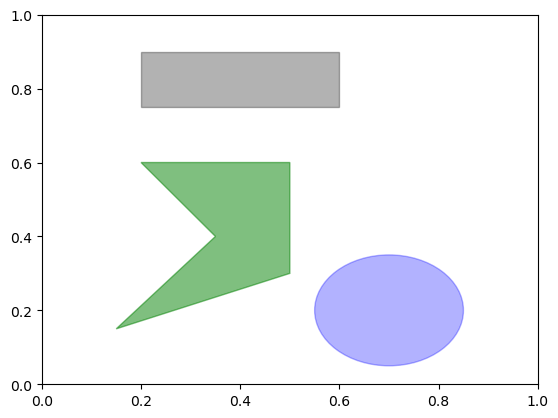

In [79]:
fig, ax = plt.subplots()

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color="black", alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color="blue", alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6], [0.5, 0.6], [0.5, 0.3]], color="green", alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

## 9.1.5 그래프를 파일로 저장하기

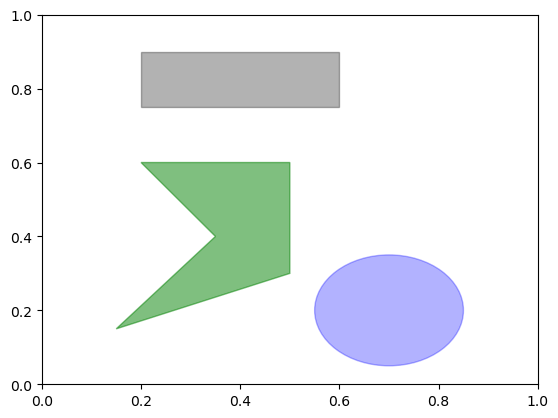

In [80]:
fig, ax = plt.subplots()

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color="black", alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color="blue", alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6], [0.5, 0.6], [0.5, 0.3]], color="green", alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

fig.savefig("figpath.svg")

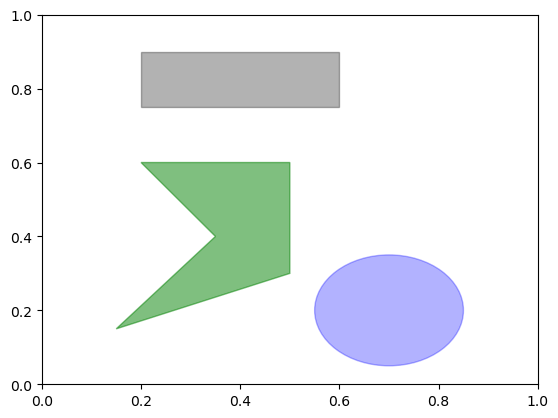

In [82]:
fig, ax = plt.subplots()

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color="black", alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color="blue", alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6], [0.5, 0.6], [0.5, 0.3]], color="green", alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

fig.savefig("figpath.png", dpi=400)

## 9.1.6 맷플롯립 설정

# 9.2 판다스에서 시본으로 그래프 그리기  
## 9.2.1 선 그래프

<Axes: >

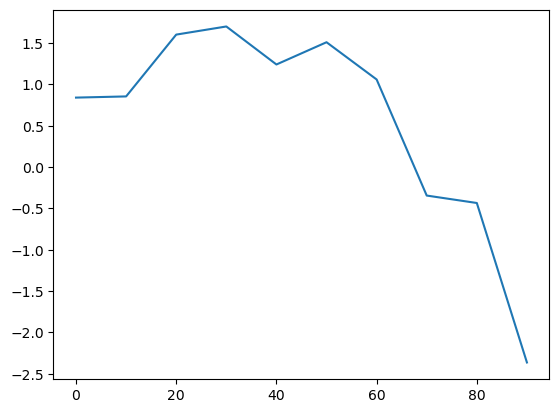

In [83]:
s = pd.Series(np.random.standard_normal(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

<Axes: >

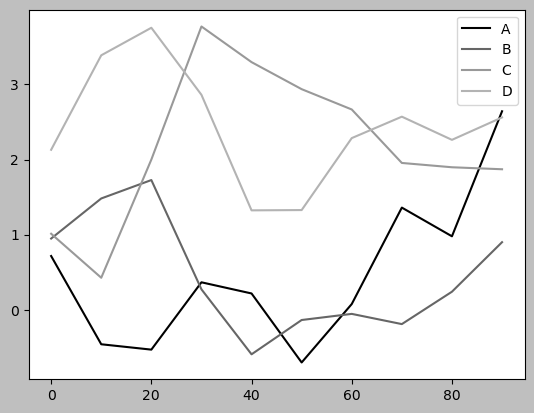

In [85]:
df = pd.DataFrame(np.random.standard_normal((10, 4)).cumsum(0),
                 columns=["A", "B", "C", "D"],
                 index=np.arange(0, 100, 10))

plt.style.use('grayscale')
df.plot()

## 9.2.2 막대그래프

<Axes: >

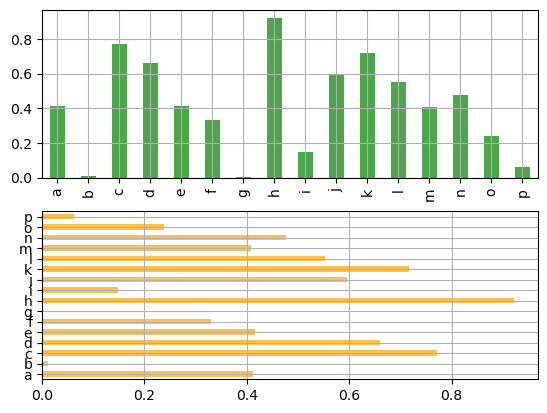

In [14]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.uniform(size=16), index=list("abcdefghijklmnop"))

data.plot.bar(ax=axes[0], color="green", alpha=0.7, grid=True)
data.plot.barh(ax=axes[1], color="orange", alpha=0.7, grid=True)

Genus         A         B         C         D
one    0.261410  0.023713  0.462898  0.102752
two    0.022357  0.966943  0.791346  0.934518
three  0.739831  0.340294  0.994138  0.439599
four   0.834687  0.515992  0.747703  0.110913
five   0.162709  0.466916  0.141333  0.770045
six    0.975096  0.317112  0.755403  0.650971


<Axes: >

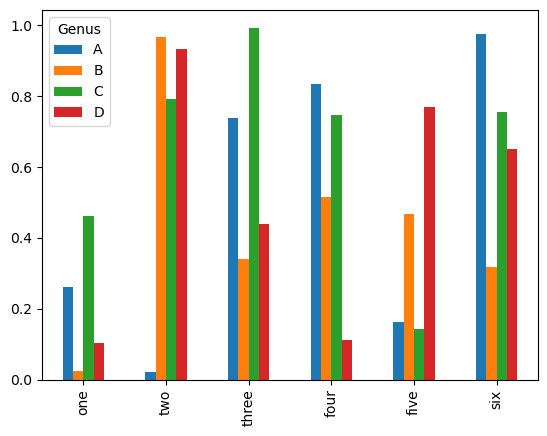

In [18]:
df = pd.DataFrame(np.random.uniform(size=(6, 4)),
                 index=["one", "two", "three", "four", "five", "six"],
                 columns=pd.Index(["A", "B", "C", "D"], name="Genus"))
print(df)

df.plot.bar()

<Axes: >

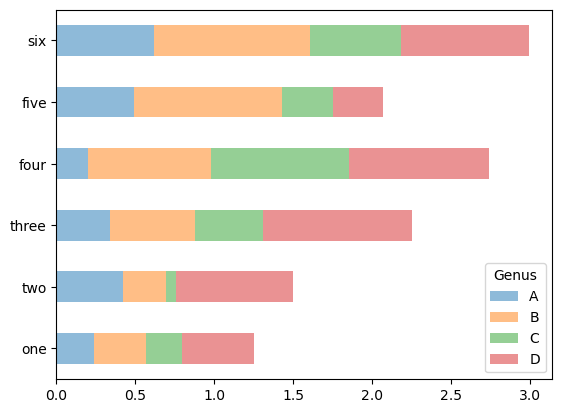

In [21]:
df = pd.DataFrame(np.random.uniform(size=(6, 4)),
                 index=["one", "two", "three", "four", "five", "six"],
                 columns=pd.Index(["A", "B", "C", "D"], name="Genus"))

df.plot.barh(stacked=True, alpha=0.5)

### 레스토랑의 팁 데이터셋 예제

In [4]:
tips = pd.read_csv("tips.csv")
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [5]:
party_counts = pd.crosstab(tips["day"], tips["size"])
party_counts = party_counts.reindex(index=["Thur", "Fri", "Sat", "Sun"])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


In [6]:
party_counts = party_counts.loc[:, 2:5]

party_pcts = party_counts.div(party_counts.sum(axis="columns"), axis="index")
party_pcts

size,2,3,4,5
day,,,,
Thur,0.827586,0.068966,0.086207,0.017241
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000


<Axes: xlabel='day'>

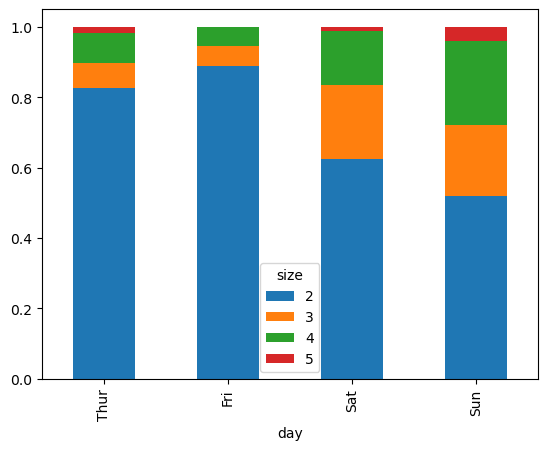

In [5]:
party_pcts.plot.bar(stacked=True)

In [7]:
import seaborn as sns

tips["tip_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<Axes: xlabel='tip_pct', ylabel='day'>

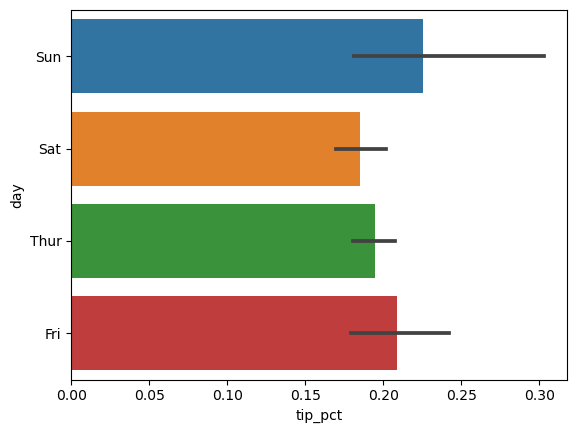

In [8]:
sns.barplot(x="tip_pct", y="day", data=tips, orient="h")

<Axes: xlabel='tip_pct', ylabel='day'>

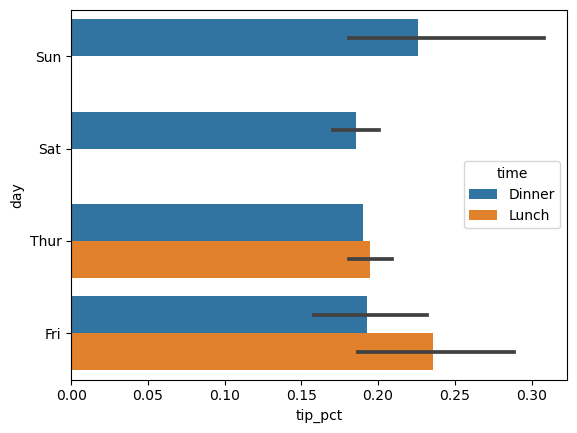

In [9]:
sns.barplot(x="tip_pct", y="day", hue="time", data=tips, orient="h")

<Axes: xlabel='tip_pct', ylabel='day'>

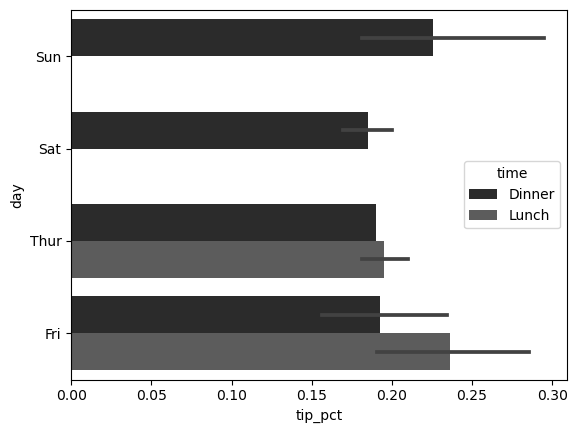

In [9]:
# sns.set_style("whitegrid")
sns.set_palette("Greys_r")
sns.barplot(x="tip_pct", y="day", hue="time", data=tips, orient="h")

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

## 9.2.3 히스토그램과 밀도 그래프

<Axes: ylabel='Frequency'>

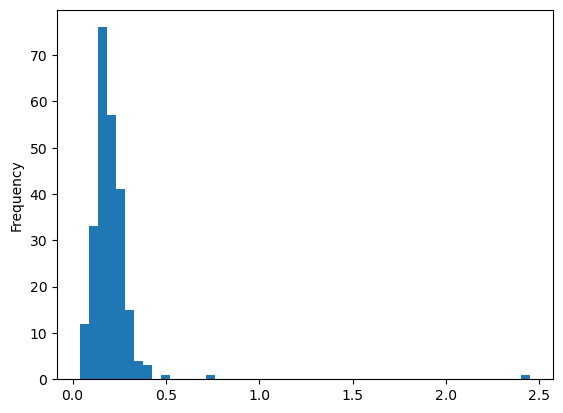

In [11]:
tips["tip_pct"].plot.hist(bins=50)

<Axes: ylabel='Density'>

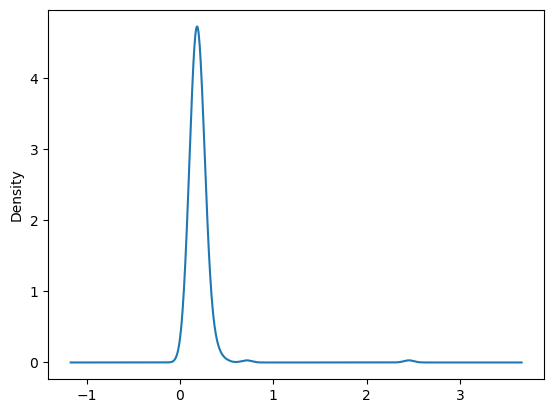

In [13]:
tips["tip_pct"].plot.density()

<Axes: ylabel='Count'>

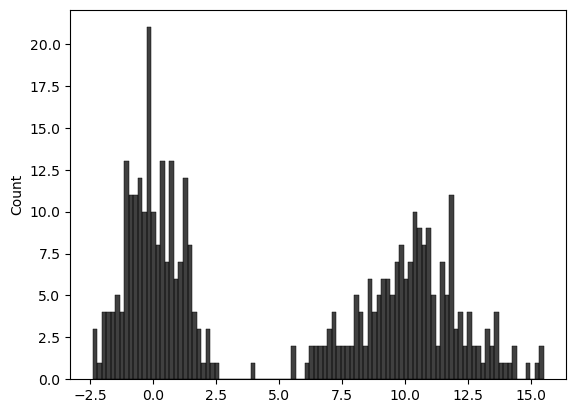

In [15]:
comp1 = np.random.standard_normal(200)
comp2 = 10 + 2 * np.random.standard_normal(200)
values = pd.Series(np.concatenate([comp1, comp2]))

sns.histplot(values, bins=100, color="black")

## 9.2.4 산포도

In [20]:
macro = pd.read_csv("macrodata.csv")
data = macro[["cpi", "m1", "tbilrate", "unemp"]]
trans_data = np.log(data).diff().dropna()
trans_data.tail()

   year  quarter   realgdp  realcons  realinv  realgovt  realdpi    cpi  \
0  1959        1  2710.349    1707.4  286.898   470.045   1886.9  28.98   
1  1959        2  2778.801    1733.7  310.859   481.301   1919.7  29.15   
2  1959        3  2775.488    1751.8  289.226   491.260   1916.4  29.35   
3  1959        4  2785.204    1753.7  299.356   484.052   1931.3  29.37   
4  1960        1  2847.699    1770.5  331.722   462.199   1955.5  29.54   

      m1  tbilrate  unemp      pop  infl  realint  
0  139.7      2.82    5.8  177.146  0.00     0.00  
1  141.7      3.08    5.1  177.830  2.34     0.74  
2  140.5      3.82    5.3  178.657  2.74     1.09  
3  140.0      4.33    5.6  179.386  0.27     4.06  
4  139.6      3.50    5.2  180.007  2.31     1.19  


,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5, 1.0, 'Changes in log(m1) versus log(unemp)')

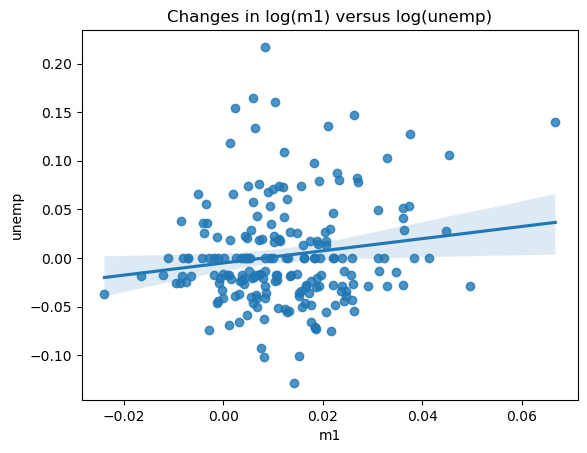

In [18]:
ax = sns.regplot(x="m1", y="unemp", data=trans_data)
ax.set_title("Changes in log(m1) versus log(unemp)")

C:\Users\mit06\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


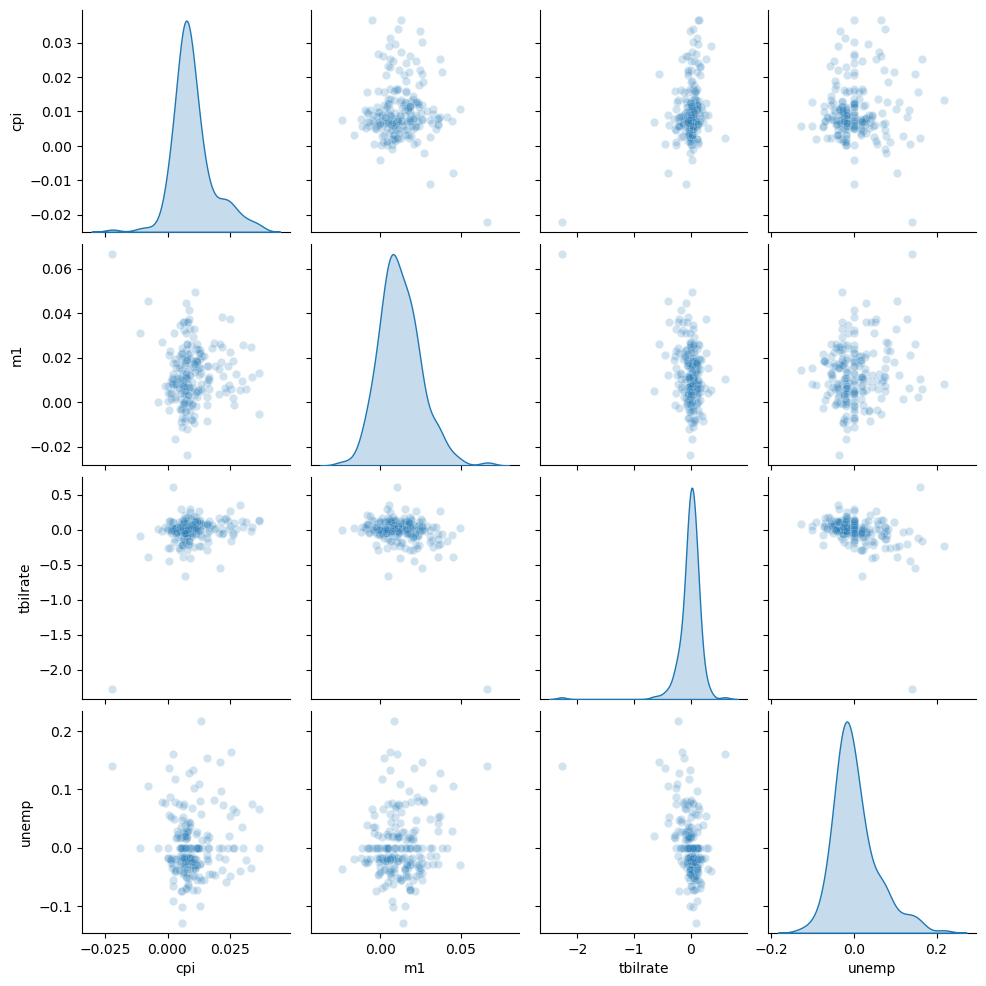

In [27]:
sns.pairplot(trans_data, diag_kind="kde", plot_kws={"alpha": 0.2})

## 9.2.5 패싯 그리드와 범주형 데이터

C:\Users\mit06\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


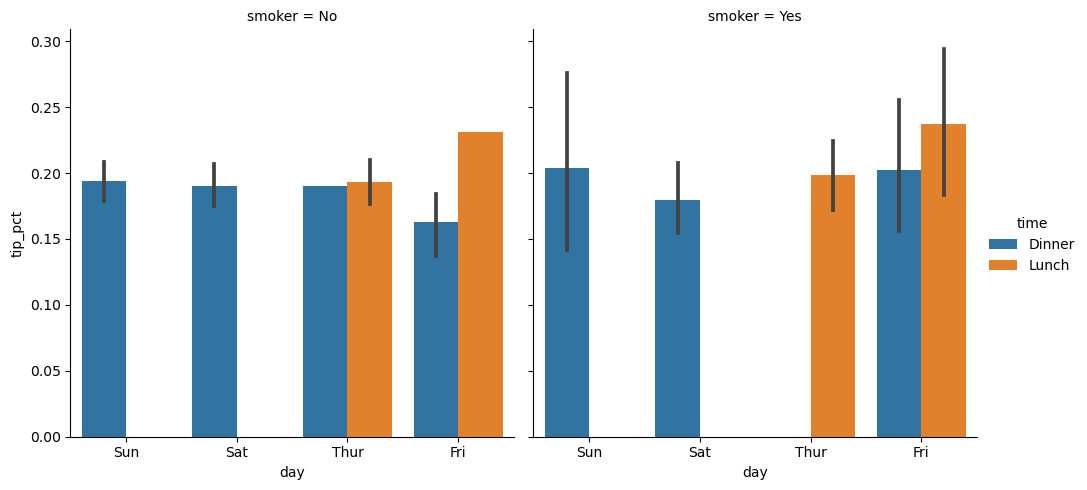

In [28]:
sns.catplot(x="day", y="tip_pct", hue="time", col="smoker",
            kind="bar", data=tips[tips.tip_pct < 1])

C:\Users\mit06\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


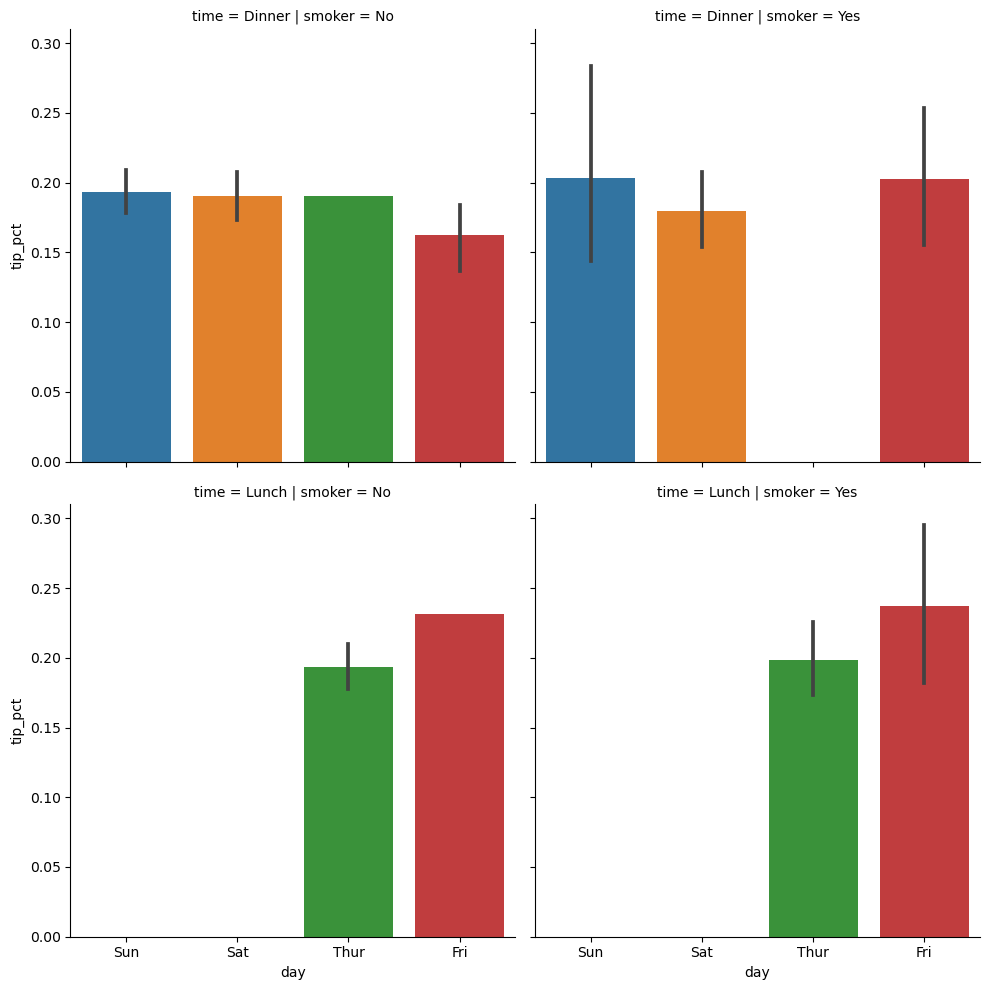

In [30]:
sns.catplot(x="day", y="tip_pct", row="time", col="smoker",
            kind="bar", data=tips[tips.tip_pct < 1])

C:\Users\mit06\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


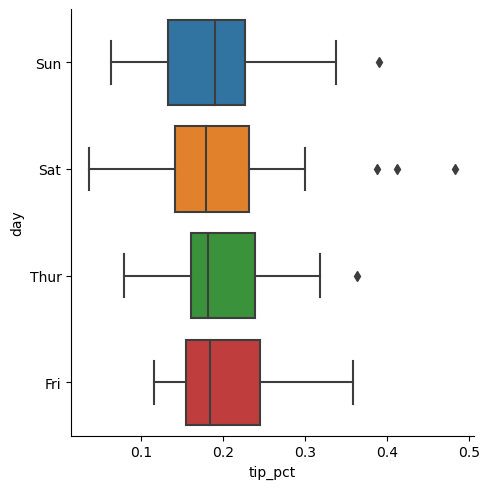

In [31]:
sns.catplot(x="tip_pct", y="day", kind="box", data=tips[tips.tip_pct < 0.5])

# 시각화 특강

## 데이터셋

In [1]:
import seaborn as sns
import pandas as pd

sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

## 데이터셋 : tips

In [7]:
df = sns.load_dataset('tips')
# 데이터 확인
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df = sns.load_dataset('tips')
# 데이터 수와 데이터 타입, Null 수 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [8]:
df = sns.load_dataset('tips')
# 기초 통계
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [10]:
df = sns.load_dataset('tips')
# 고유한 값 찾기
df['sex'].unique()

['Female', 'Male']
Categories (2, object): ['Male', 'Female']

In [11]:
df = sns.load_dataset('tips')
# 고유한 행의 갯수 확인
df['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

## 데이터 시각화 : 산점도 scatterplot

<Axes: xlabel='total_bill', ylabel='tip'>

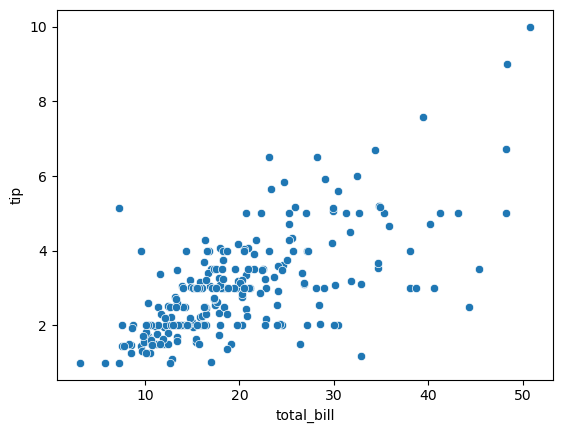

In [12]:
df = sns.load_dataset('tips')

# 음식가격(total_bill)과 팁(tip)의 상관관계
sns.scatterplot(x=df['total_bill'], y=df['tip'])

<Axes: xlabel='total_bill', ylabel='tip'>

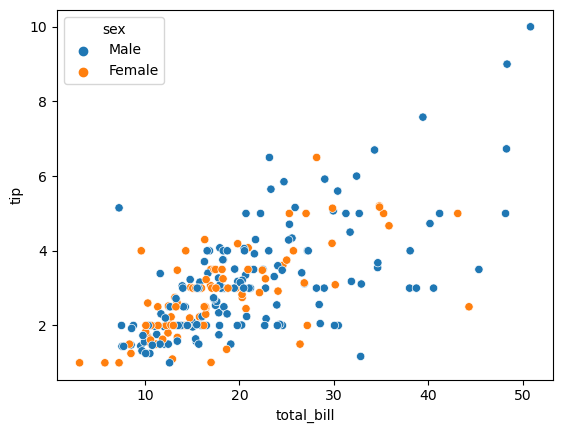

In [13]:
df = sns.load_dataset('tips')

# 음식가격(total_bill)과 팁(tip)의 상관관계
sns.scatterplot(x=df['total_bill'], y=df['tip'], hue=df['sex'])

<Axes: xlabel='total_bill', ylabel='tip'>

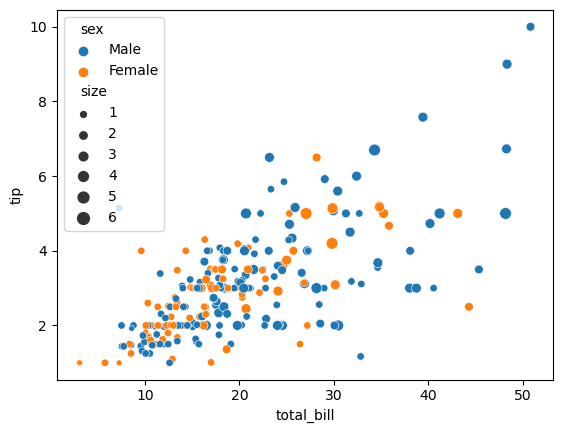

In [15]:
df = sns.load_dataset('tips')

# 음식가격(total_bill)과 팁(tip)의 상관관계
sns.scatterplot(x=df['total_bill'], y=df['tip'], hue=df['sex'], size=df['size'])

## 데이터 시각화 : 막대그래프

<Axes: >

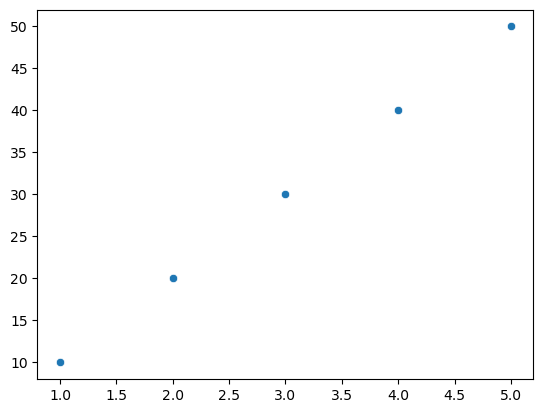

In [16]:
x = [1, 2, 3, 4, 5]
y = [10, 20, 30, 40, 50]

sns.scatterplot(x=x, y=y)

<Axes: >

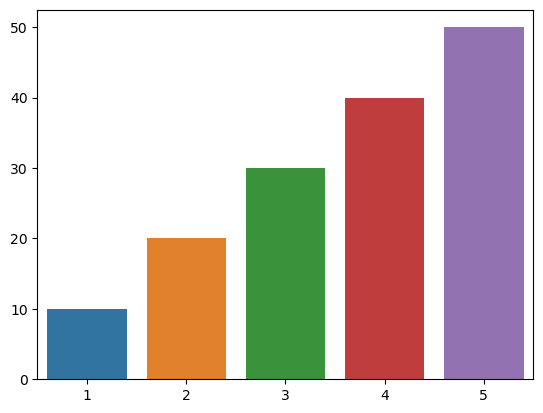

In [17]:
x = [1, 2, 3, 4, 5]
y = [10, 20, 30, 40, 50]

sns.barplot(x=x, y=y)

## 회귀선

<Axes: xlabel='total_bill', ylabel='tip'>

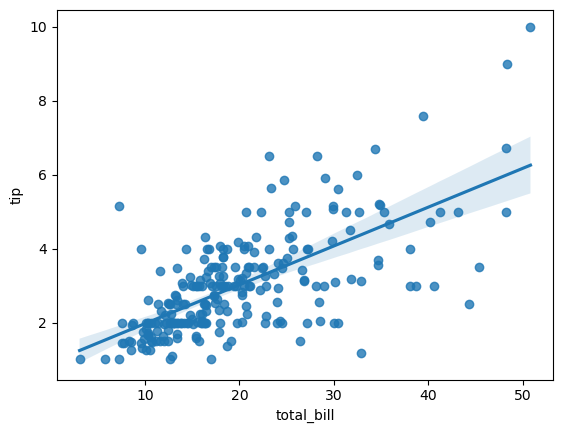

In [18]:
df = sns.load_dataset('tips')

sns.regplot(x=df['total_bill'], y=df['tip'])

<Axes: xlabel='total_bill', ylabel='tip'>

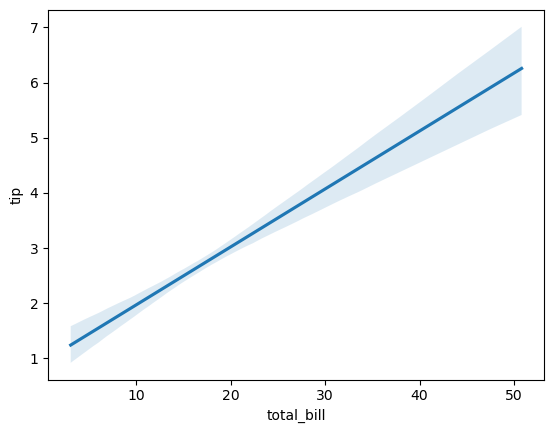

In [19]:
df = sns.load_dataset('tips')

sns.regplot(x=df['total_bill'], y=df['tip'], scatter=False)

<Axes: xlabel='total_bill', ylabel='tip'>

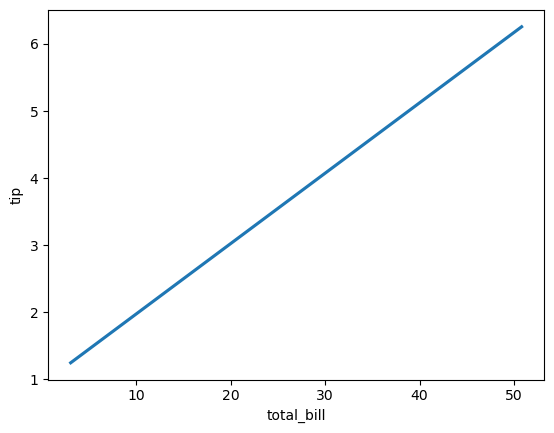

In [21]:
df = sns.load_dataset('tips')

sns.regplot(x=df['total_bill'], y=df['tip'], scatter=False, ci=None)

## 선그래프

<Axes: >

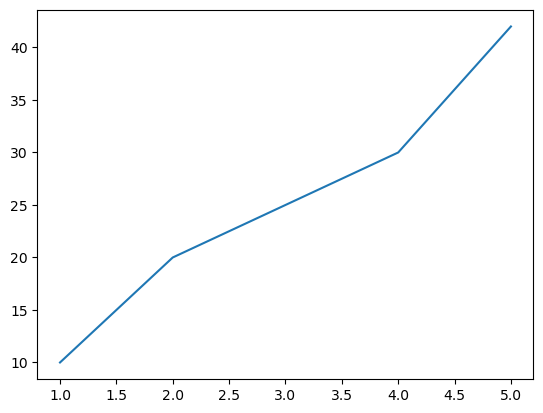

In [22]:
x = [1, 2, 3, 4, 5]
y = [10, 20, 25, 30, 42]

sns.lineplot(x=x, y=y)

<Axes: xlabel='size', ylabel='tip'>

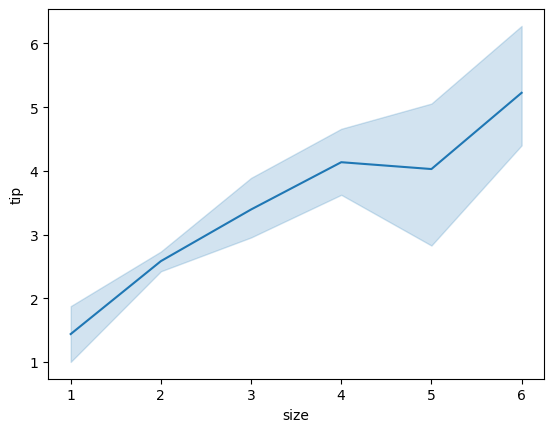

In [24]:
df = sns.load_dataset('tips')
# 인원수(size) 변화에 따른 팁(tip)의 변화량
sns.lineplot(x=df['size'], y=df['tip'])

## 막대그래프

<Axes: xlabel='size', ylabel='tip'>

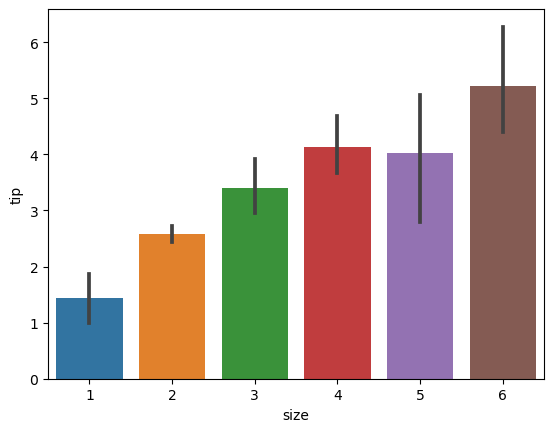

In [25]:
df = sns.load_dataset('tips')

sns.barplot(x=df['size'], y=df['tip'])

C:\Users\mit06\AppData\Local\Temp\ipykernel_5348\221695577.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['size'], y=df['tip'], ci=None)


<Axes: xlabel='size', ylabel='tip'>

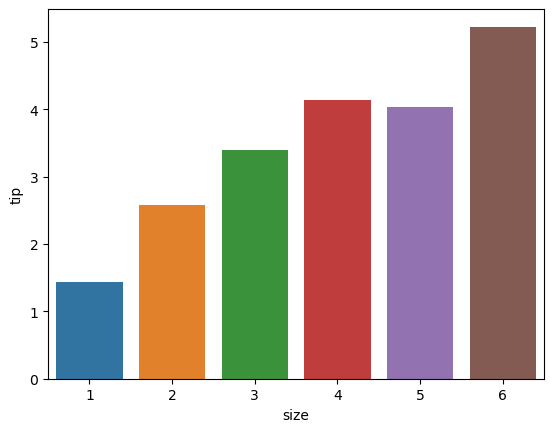

In [26]:
df = sns.load_dataset('tips')
# 신뢰구간 제거
sns.barplot(x=df['size'], y=df['tip'], ci=None)

<Axes: xlabel='day', ylabel='count'>

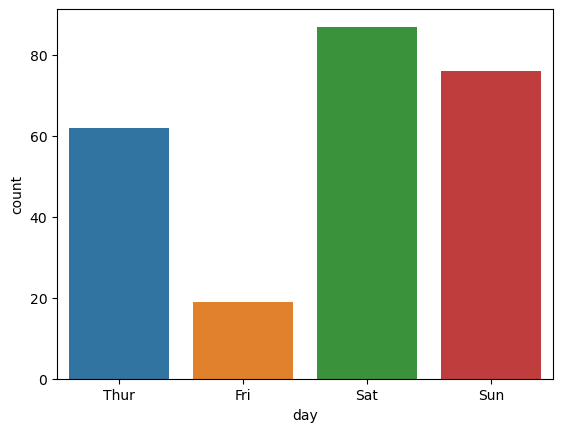

In [27]:
df = sns.load_dataset('tips')

sns.countplot(x=df['day'])

<Axes: xlabel='day', ylabel='tip'>

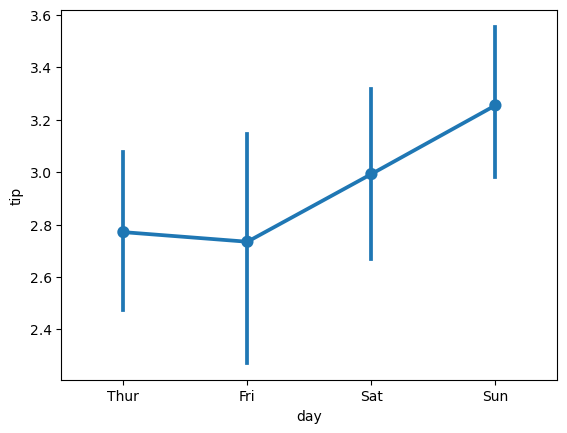

In [29]:
df = sns.load_dataset('tips')

sns.pointplot(x=df['day'], y=df['tip'])

## 박스플롯

<Axes: xlabel='size', ylabel='tip'>

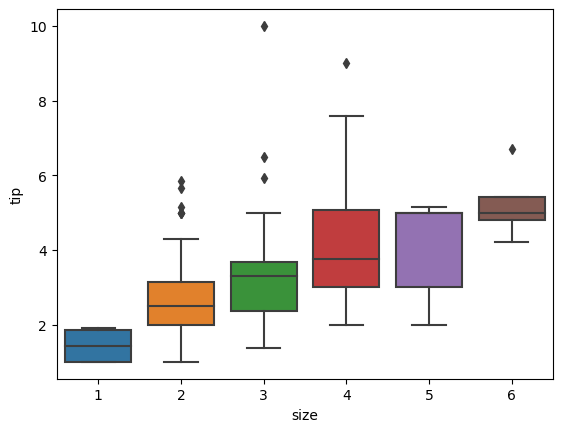

In [31]:
df = sns.load_dataset('tips')

sns.boxplot(x=df['size'], y=df['tip'])

## 바이올린플롯

<Axes: xlabel='size', ylabel='tip'>

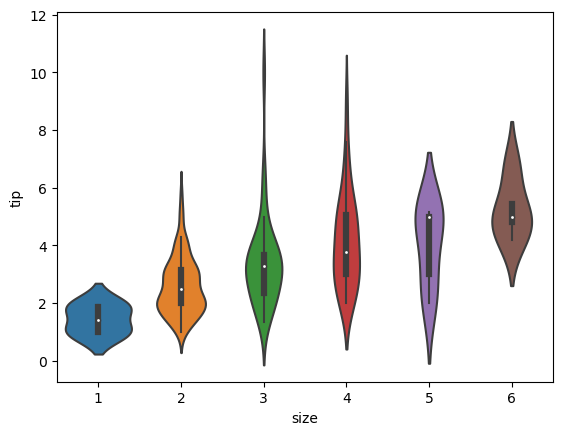

In [32]:
df = sns.load_dataset('tips')

sns.violinplot(x=df['size'], y=df['tip'])

## 히스토그램

<Axes: xlabel='total_bill', ylabel='Count'>

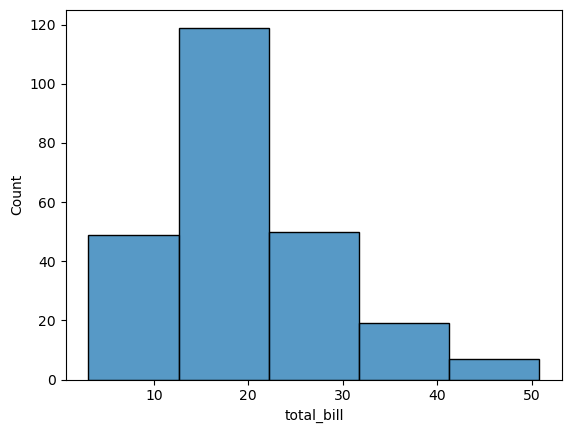

In [33]:
df = sns.load_dataset('tips')

sns.histplot(data=df['total_bill'], bins=5)

<Axes: xlabel='total_bill', ylabel='Count'>

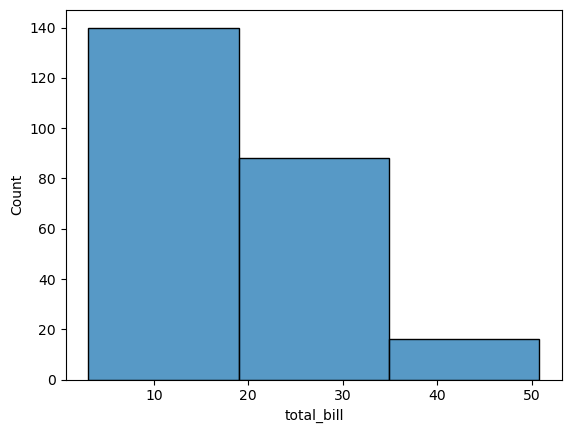

In [35]:
df = sns.load_dataset('tips')

sns.histplot(data=df['total_bill'], bins=3)

<Axes: xlabel='total_bill', ylabel='Count'>

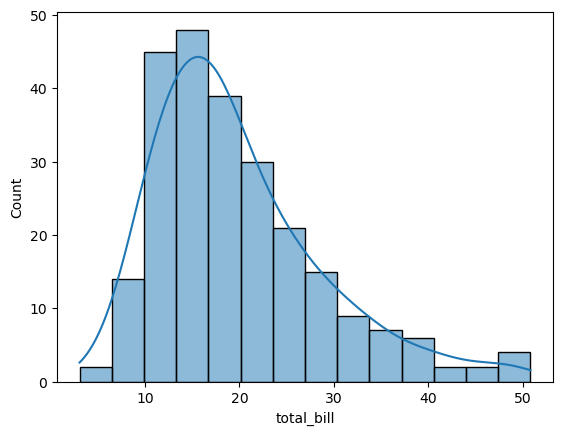

In [36]:
df = sns.load_dataset('tips')

sns.histplot(data=df['total_bill'], kde=True)

<Axes: xlabel='total_bill', ylabel='Count'>

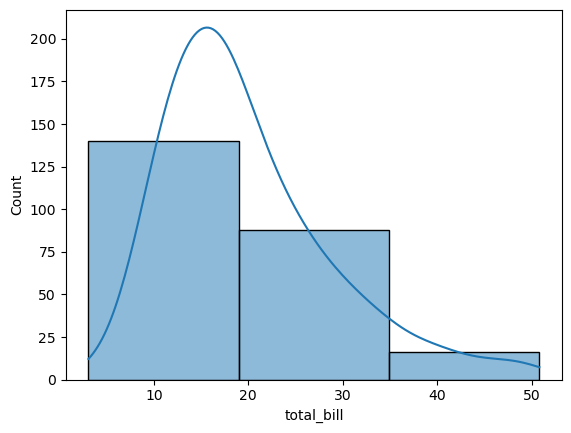

In [37]:
df = sns.load_dataset('tips')

sns.histplot(data=df['total_bill'], bins=3, kde=True)

<Axes: xlabel='day', ylabel='Count'>

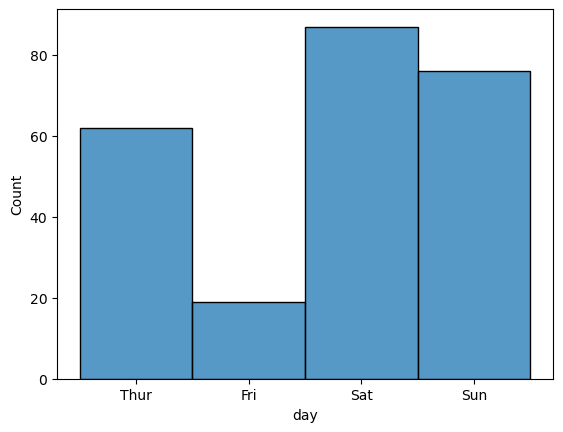

In [38]:
df = sns.load_dataset('tips')

sns.histplot(data=df['day'])

## kdeplot

<Axes: xlabel='total_bill', ylabel='Density'>

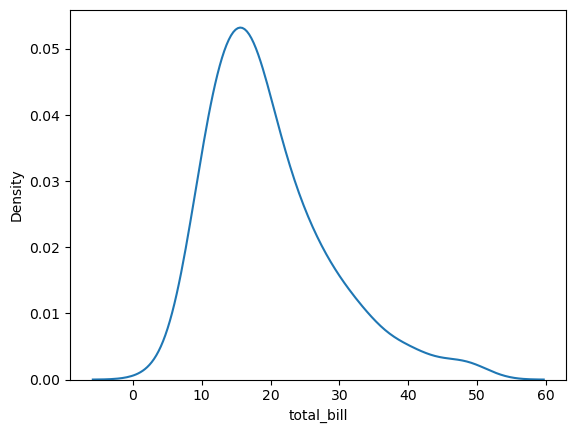

In [40]:
df = sns.load_dataset('tips')

sns.kdeplot(data=df['total_bill'])

## rugplot

<Axes: xlabel='total_bill'>

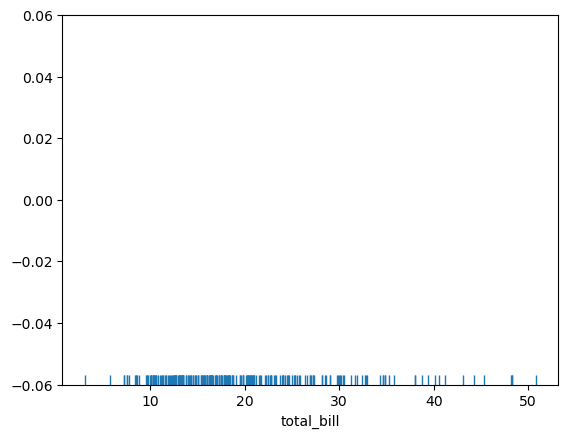

In [42]:
df = sns.load_dataset('tips')

sns.rugplot(data=df['total_bill'])

## 히트맵

In [45]:
df = sns.load_dataset('tips')

pivot_df = df.pivot_table('tip', 'day', 'size')
pivot_df

size,1,2,3,4,5,6
day,,,,,,
Thur,1.83,2.442500,2.692500,4.218000,5.000000,5.3
Fri,1.92,2.644375,3.000000,4.730000,NaN,NaN
Sat,1.00,2.517547,3.797778,4.123846,3.000000,NaN
Sun,NaN,2.816923,3.120667,4.087778,4.046667,5.0


In [46]:
df = sns.load_dataset('tips')

df.pivot_table('tip', 'day', 'size', aggfunc='count')

size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


<Axes: xlabel='size', ylabel='day'>

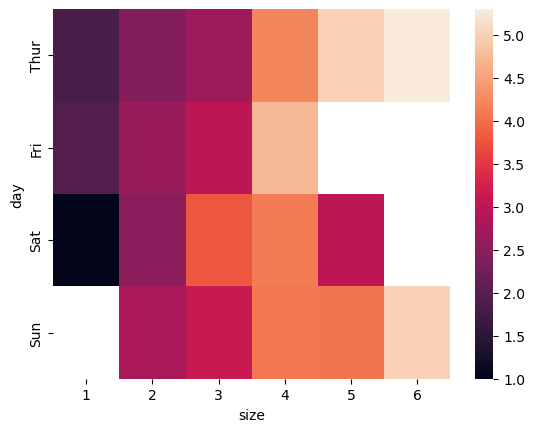

In [48]:
df = sns.load_dataset('tips')
pivot_df = df.pivot_table('tip', 'day', 'size')

sns.heatmap(pivot_df)

In [54]:
df = sns.load_dataset('tips')

pivot_df = df.pivot_table('tip', 'day', 'size')
pivot_df.fillna(0, inplace=True)
pivot_df

size,1,2,3,4,5,6
day,,,,,,
Thur,1.83,2.442500,2.692500,4.218000,5.000000,5.3
Fri,1.92,2.644375,3.000000,4.730000,0.000000,0.0
Sat,1.00,2.517547,3.797778,4.123846,3.000000,0.0
Sun,0.00,2.816923,3.120667,4.087778,4.046667,5.0


<Axes: xlabel='size', ylabel='day'>

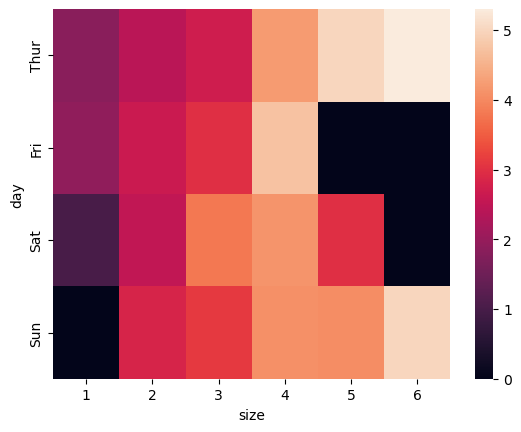

In [2]:
df = sns.load_dataset('tips')

pivot_df = df.pivot_table('tip', 'day', 'size')
pivot_df.fillna(0, inplace=True)

sns.heatmap(pivot_df)

<Axes: xlabel='size', ylabel='day'>

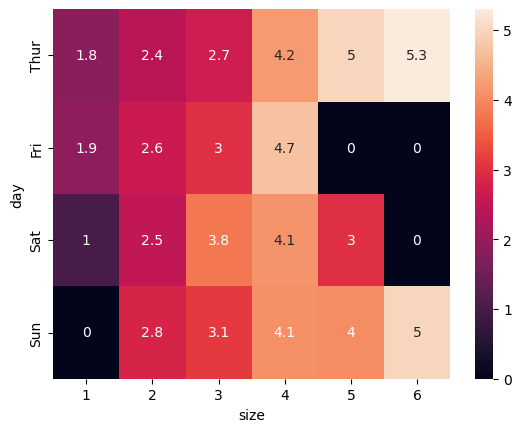

In [3]:
df = sns.load_dataset('tips')

pivot_df = df.pivot_table('tip', 'day', 'size')
pivot_df.fillna(0, inplace=True)

sns.heatmap(pivot_df, annot=True)